In [148]:
from typing import Any
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
retention_cohort_A_all_df: Any
retention_cohort_B_all_df: Any
retention_cohort_A_purchase_df: Any
retention_cohort_B_purchase_df: Any
%store -r retention_cohort_A_all_df
%store -r retention_cohort_B_all_df
%store -r retention_cohort_A_purchase_df
%store -r retention_cohort_B_purchase_df

In [149]:
print(retention_cohort_A_all_df)
print(retention_cohort_B_all_df)

   Day  Retention Rate (%)  Churn Rate (%)
0    0          100.000000        0.000000
1    1           52.483901       47.516099
2    2           45.860166       54.139834
3    3           41.835327       58.164673
4    4           37.971481       62.028519
5    5           33.578657       66.421343
6    6           28.449862       71.550138
7    7           22.079117       77.920883
   Day  Retention Rate (%)  Churn Rate (%)
0    0          100.000000        0.000000
1    1           55.171619       44.828381
2    2           47.385395       52.614605
3    3           42.271366       57.728634
4    4           38.124856       61.875144
5    5           33.471550       66.528450
6    6           28.587883       71.412117
7    7           21.101129       78.898871


In [150]:
# read data
data = pd.read_csv("./data/data.csv",delimiter=";")
#print(data)

In [151]:
# splitting data into two dataframes by column AB_Cohort
# Разделение данных на два DataFrame по значению столбца "AB_Cohort"
data_cohort_A = data[data['AB_Cohort'] == 'A']
data_cohort_B = data[data['AB_Cohort'] == 'B']

# Сохранение двух DataFrame в файлы CSV
data_cohort_A.to_csv("./data_proc/data_cohort_A.csv", index=False)
data_cohort_B.to_csv("./data_proc/data_cohort_B.csv", index=False)

In [152]:
#1 Average revenue per user
# Функция для вычисления среднего дохода на пользователя
def calculate_avg_revenue(data, filter_by_purchase=False):
    if filter_by_purchase:
        data = data[data['CountBuy'] > 0]

    # Группируем данные по когорте и дню, затем вычисляем средний доход
    avg_revenue_by_cohort_day = data.groupby(['AB_Cohort', 'Retention'])['SumRevenue'].mean().reset_index()
    avg_revenue_by_cohort = data.groupby(['AB_Cohort'])['SumRevenue'].mean().reset_index()

    return avg_revenue_by_cohort_day,avg_revenue_by_cohort

# Вычисляем средний доход для всех пользователей
avg_revenue_cohort_A_all_users_by_day,avg_revenue_cohort_A_all_users = calculate_avg_revenue(data_cohort_A)
avg_revenue_cohort_B_all_users_by_day,avg_revenue_cohort_B_all_users =calculate_avg_revenue(data_cohort_B)

# Вычисляем средний доход для пользователей с покупками
avg_revenue_cohort_A_purchase_users_by_day,avg_revenue_cohort_A_purchase_users = calculate_avg_revenue(data_cohort_A, filter_by_purchase=True)
avg_revenue_cohort_B_purchase_users_by_day,avg_revenue_cohort_B_purchase_users = calculate_avg_revenue(data_cohort_B, filter_by_purchase=True)

print("Средний доход для кагорты A для всех пользователей по дням:",avg_revenue_cohort_A_all_users_by_day)
print("Средний доход для кагорты A для всех пользователей за 7 дней:",avg_revenue_cohort_A_all_users)
print("Средний доход для кагорты B для всех пользователей по дням:",avg_revenue_cohort_B_all_users_by_day)
print("Средний доход для кагорты B для всех пользователей за 7 дней:",avg_revenue_cohort_B_all_users)
print("Средний доход для кагорты A для пользователей с покупками по дням:",avg_revenue_cohort_A_purchase_users_by_day)
print("Средний доход для кагорты A для пользователей с покупками за 7 дней:",avg_revenue_cohort_A_purchase_users)
print("Средний доход для кагорты B для пользователей с покупками по дням:",avg_revenue_cohort_B_purchase_users_by_day)
print("Средний доход для кагорты B для пользователей с покупками за 7 дней:",avg_revenue_cohort_B_purchase_users)

Средний доход для кагорты A для всех пользователей по дням:   AB_Cohort  Retention  SumRevenue
0         A          0    0.775075
1         A          1    0.601936
2         A          2    0.555142
3         A          3    0.397699
4         A          4    0.817866
5         A          5    0.098973
6         A          6    0.717817
7         A          7    0.852083
Средний доход для кагорты A для всех пользователей за 7 дней:   AB_Cohort  SumRevenue
0         A     0.64128
Средний доход для кагорты B для всех пользователей по дням:   AB_Cohort  Retention  SumRevenue
0         B          0    1.557305
1         B          1    2.580608
2         B          2    1.827910
3         B          3    2.981163
4         B          4    1.030303
5         B          5    0.182432
6         B          6    2.913219
7         B          7    4.058952
Средний доход для кагорты B для всех пользователей за 7 дней:   AB_Cohort  SumRevenue
0         B     1.99307
Средний доход для кагорты A дл

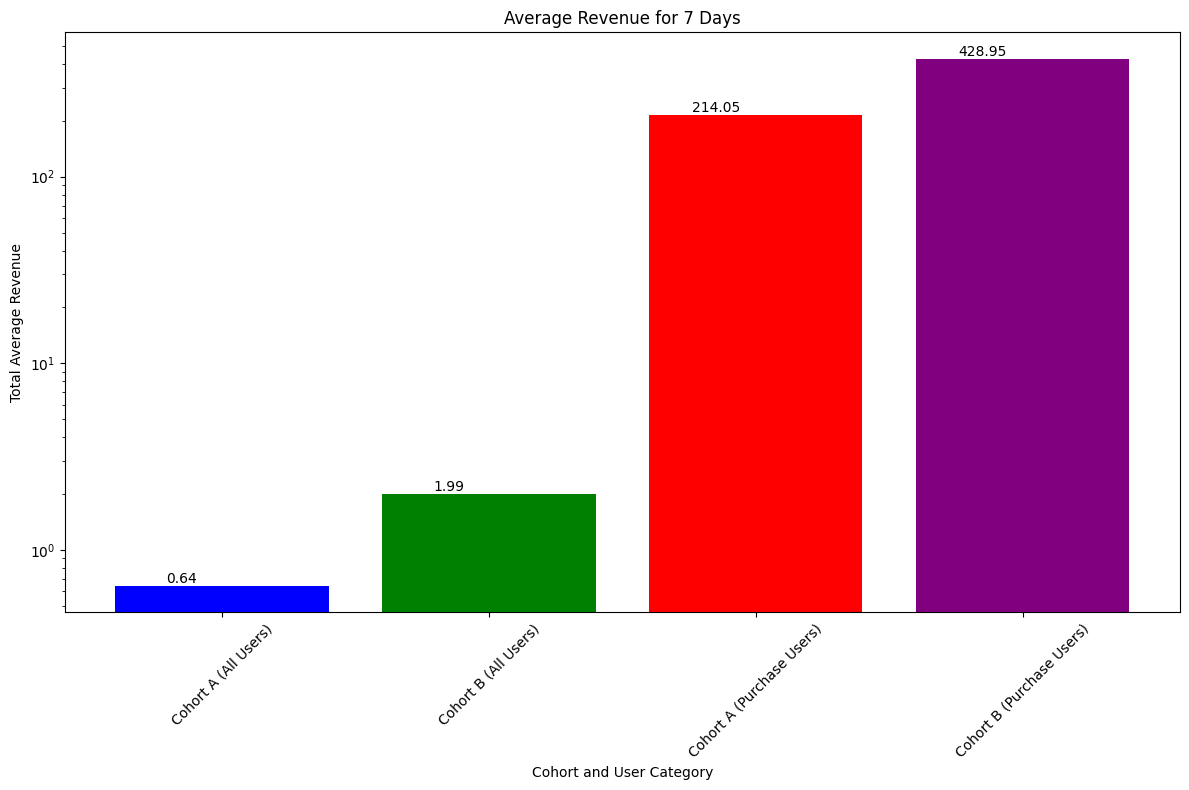

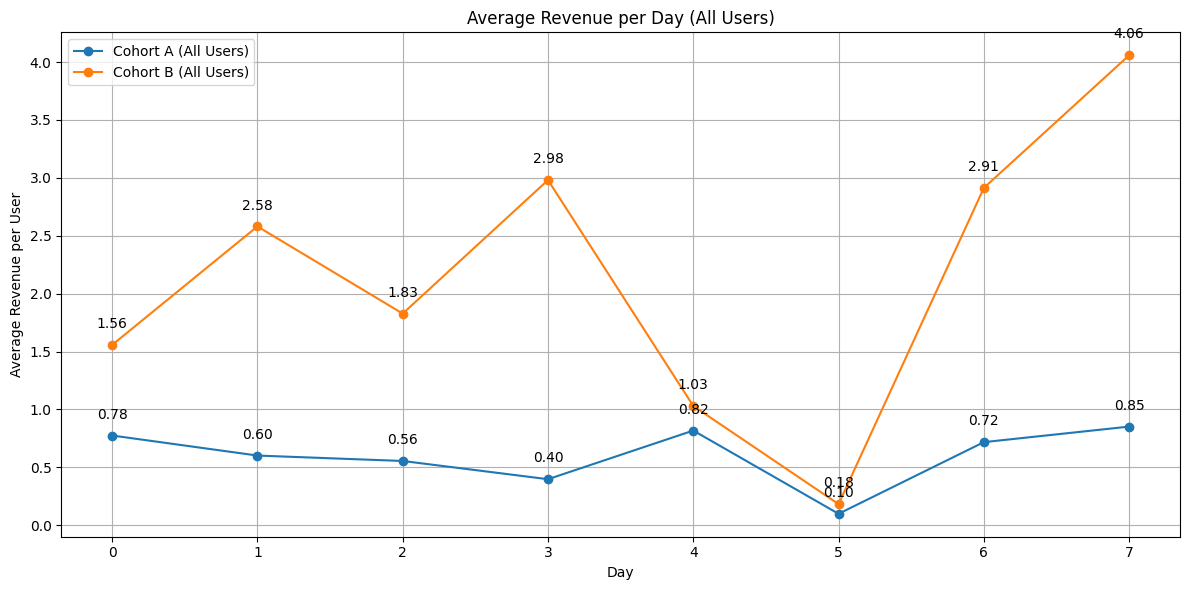

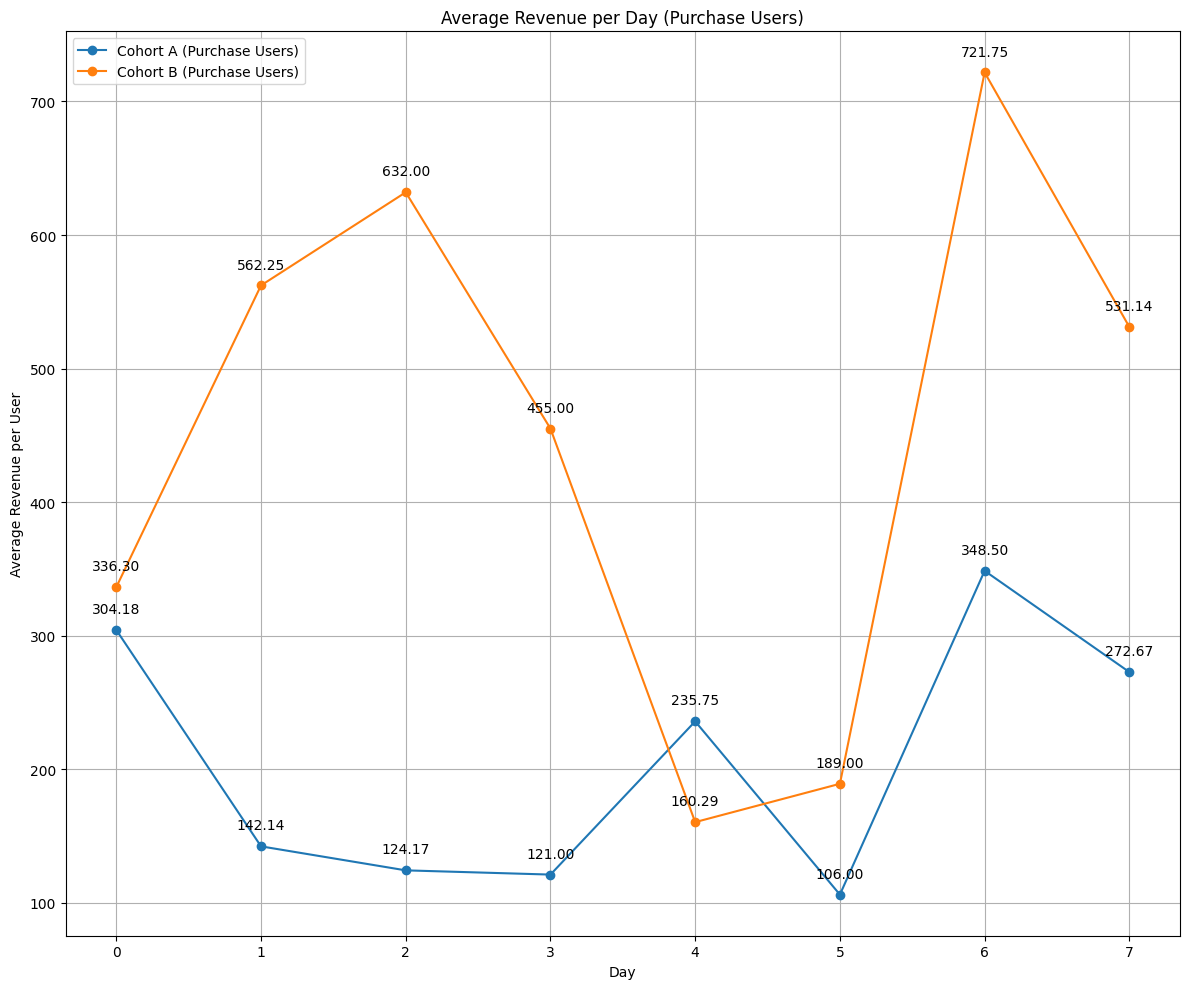

In [153]:
#1.2 Average revenue per user
# Данные
days = np.arange(0, 8)  # 7 дней

revenue_data_7_days = [avg_revenue_cohort_A_all_users['SumRevenue'].sum(), avg_revenue_cohort_B_all_users['SumRevenue'].sum(),
                       avg_revenue_cohort_A_purchase_users['SumRevenue'].sum(), avg_revenue_cohort_B_purchase_users['SumRevenue'].sum()]

labels_7_days = ['Cohort A (All Users)', 'Cohort B (All Users)', 'Cohort A (Purchase Users)', 'Cohort B (Purchase Users)']

# Создание гистограммы для данных "за 7 дней" с логарифмической шкалой
plt.figure(figsize=(12, 8))
bars = plt.bar(labels_7_days, revenue_data_7_days, color=['blue', 'green', 'red', 'purple'])
plt.title('Average Revenue for 7 Days')
plt.xlabel('Cohort and User Category')
plt.ylabel('Total Average Revenue')
plt.xticks(rotation=45)
plt.yscale('log')  # Добавление логарифмической шкалы

# Добавление значений величин внутрь столбцов
for bar, revenue in zip(bars, revenue_data_7_days):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, revenue, f'{revenue:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()

# Данные для графика изменения среднего дохода на пользователя по дням
revenue_data_per_day_A_all_users = avg_revenue_cohort_A_all_users_by_day['SumRevenue']
revenue_data_per_day_B_all_users = avg_revenue_cohort_B_all_users_by_day['SumRevenue']
revenue_data_per_day_A_purchase_users = avg_revenue_cohort_A_purchase_users_by_day['SumRevenue']
revenue_data_per_day_B_purchase_users = avg_revenue_cohort_B_purchase_users_by_day['SumRevenue']

# Создание графика изменения среднего дохода на пользователя по дням для "All Users"
plt.figure(figsize=(12, 6))
plt.plot(days, revenue_data_per_day_A_all_users, marker='o', label='Cohort A (All Users)')
plt.plot(days, revenue_data_per_day_B_all_users, marker='o', label='Cohort B (All Users)')
plt.title('Average Revenue per Day (All Users)')
plt.xlabel('Day')
plt.ylabel('Average Revenue per User')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Добавление значений величин рядом с точками данных для Cohort A и Cohort B - All Users
for day, revenue_A_all, revenue_B_all in zip(
    days, revenue_data_per_day_A_all_users, revenue_data_per_day_B_all_users
):
    plt.annotate(f'{revenue_A_all:.2f}', (day, revenue_A_all), textcoords="offset points", xytext=(0, 10), ha='center', va='bottom', fontsize=10)
    plt.annotate(f'{revenue_B_all:.2f}', (day, revenue_B_all), textcoords="offset points", xytext=(0, 10), ha='center', va='bottom', fontsize=10)

# Создание графика изменения среднего дохода на пользователя по дням для "Purchase Users" (если есть данные)
if 'avg_revenue_cohort_A_purchase_users_by_day' in locals() and 'avg_revenue_cohort_B_purchase_users_by_day' in locals():
    plt.figure(figsize=(12, 10))
    plt.plot(days, revenue_data_per_day_A_purchase_users, marker='o', label='Cohort A (Purchase Users)')
    plt.plot(days, revenue_data_per_day_B_purchase_users, marker='o', label='Cohort B (Purchase Users)')
    plt.title('Average Revenue per Day (Purchase Users)')
    plt.xlabel('Day')
    plt.ylabel('Average Revenue per User')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    # Добавление значений величин рядом с точками данных для Cohort A и Cohort B - Purchase Users
    for day, revenue_A_purchase, revenue_B_purchase in zip(
        days, revenue_data_per_day_A_purchase_users, revenue_data_per_day_B_purchase_users
    ):
        plt.annotate(f'{revenue_A_purchase:.2f}', (day, revenue_A_purchase), textcoords="offset points", xytext=(0, 10), ha='center', va='bottom', fontsize=10)
        plt.annotate(f'{revenue_B_purchase:.2f}', (day, revenue_B_purchase), textcoords="offset points", xytext=(0, 10), ha='center', va='bottom', fontsize=10)

plt.show()


In [160]:
#2.1 LTV
ltv_A_all_users_7_days = (
    float(avg_revenue_cohort_A_all_users["SumRevenue"]) *  # Суммируем среднюю выручку за 7 дней
    retention_cohort_A_all_df["Retention Rate (%)"][7] /                      # Здесь [7] - это день 7
    retention_cohort_A_all_df["Churn Rate (%)"][7]                           # Здесь [7] - это день 7
)

# Рассчитайте суммарный LTV за 7 дней для когорты B (все пользователи)
ltv_B_all_users_7_days = (
    float(avg_revenue_cohort_B_all_users["SumRevenue"]) *  # Суммируем среднюю выручку за 7 дней
    retention_cohort_B_all_df["Retention Rate (%)"][7] /                      # Здесь [7] - это день 7
    retention_cohort_B_all_df["Churn Rate (%)"][7]                           # Здесь [7] - это день 7
)



22.079116835326587


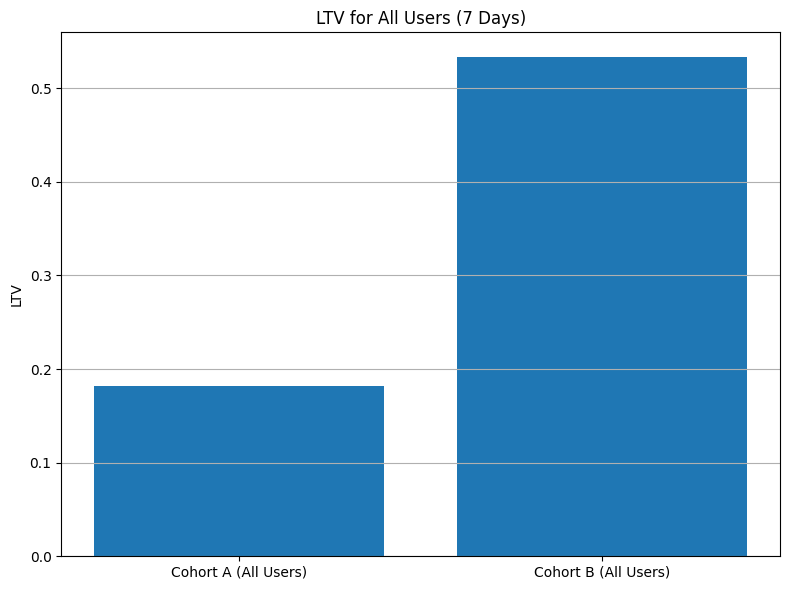

In [161]:
#2.2 LTV graph
# Создайте гистограмму LTV для когорт A и B (все пользователи) за 7 дней
plt.figure(figsize=(8, 6))
plt.bar(['Cohort A (All Users)', 'Cohort B (All Users)'], [ltv_A_all_users_7_days, ltv_B_all_users_7_days])
plt.title('LTV for All Users (7 Days)')
plt.ylabel('LTV')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
